# Assignment 1

First we need to import a few modules, execute the cell below:

In [6]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [7]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    return numpy.cos(x)

You can use the following cell to check that your code works for scalar arguments:

In [8]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [9]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [16]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    return -1*numpy.sin(x)

In [17]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [18]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [23]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    return (f(x)-f(x-dx))/dx

In [24]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


<function matplotlib.pyplot.show>

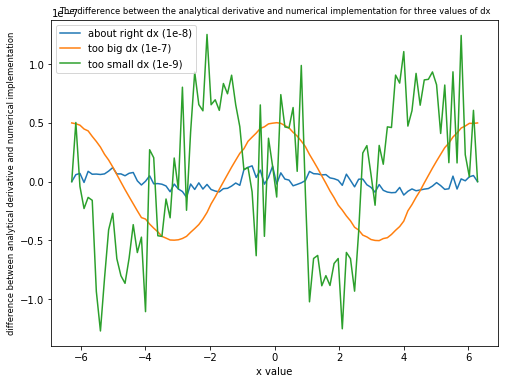

In [61]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-8)
df_dx_2 = backward_difference(f, xs, dx=1e-7)
df_dx_3 = backward_difference(f, xs, dx=1e-9)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 6))
#plt.plot(xs, df_dx_1 - df_dx_analytical)
#plt.legend('about right dx')
#plt.plot(xs, df_dx_2 - df_dx_analytical)
#plt.legend('too big dx')
#plt.plot(xs, df_dx_3 - df_dx_analytical)
#plt.legend('about right dx','too big dx','too small dx')
plt.plot(xs, df_dx_1 - df_dx_analytical,xs, df_dx_2 - df_dx_analytical,xs, df_dx_3 - df_dx_analytical)
plt.legend(('about right dx (1e-8)','too big dx (1e-7)','too small dx (1e-9)'),loc='upper left')
#label axis
plt.ylabel('difference between analytical derivative and numerical implementation', size = 'small')
plt.xlabel('x value')
#title
plt.title('The difference between the analytical derivative and numerical implementation for three values of dx', size ='small')
plt.show

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


If you were to take dx too large it would mean that you would be overestimating or underestimating the functions gradient and so it would be more accurate if you were to pick a smaller (in this case just right) value for dx. If the value for dx becomes too small then the computer cannot store the calculated gradient to enough precision and so has to generate values for the values lost when it was stored and so creates a larger error than that of a just right value for dx.